<a href="https://colab.research.google.com/github/ankit7700/project-2-EDA/blob/main/EDA_AirBnb_Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -    **AirBnb Bookings EDA**



##### **Project Type**    - EDA
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Ankit Choudhary
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

####Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
####This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [152]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

### Dataset Loading

In [153]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
path = '/content/drive/MyDrive/Colab Notebooks/data science/module 2/project 2 EDA/Airbnb NYC 2019.csv'
ab_df = pd.read_csv(path, low_memory=False)

### Dataset First View

In [155]:
# Dataset First Look
ab_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Dataset Rows & Columns count

In [156]:
# Dataset Rows & Columns count
ab_df.shape

(48895, 16)

### Dataset Information

In [157]:
# Dataset Info
ab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [158]:
# Dataset Duplicate Value Count
ab_df.duplicated().sum()

0

#### Missing Values/Null Values

In [159]:
# Missing Values/Null Values Count
null_value = ab_df.isna().sum()   # or   ab_df.isnull().sum()
null_value

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [160]:
# missing value %
missing_value = ab_df.isna().sum().sort_values(ascending=False)/len(ab_df)
missing_value_percent = round(missing_value*100,2)
missing_value_percent

last_review                       20.56
reviews_per_month                 20.56
host_name                          0.04
name                               0.03
id                                 0.00
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [161]:
# Visualizing the missing values
fig = px.bar(x=missing_value_percent[missing_value_percent > 0.0],  y=missing_value_percent[missing_value_percent > 0.0].index)
fig.update_layout(
    title = "Missing value columns %",
    xaxis_title = "Percent",
    yaxis_title = "column name",)
fig.show()

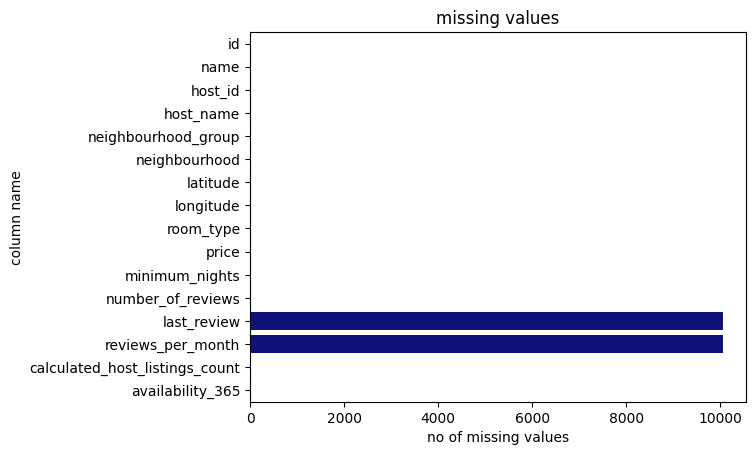

In [162]:
sns.barplot(x=null_value,  y=null_value.index, color='darkblue')
plt.title("missing values")
plt.xlabel("no of missing values")
plt.ylabel("column name")
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(ab_df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# Dataset Describe
ab_df.describe().transpose()       # or   ab_df.describe(include='all').transpose()

count          mean           std  \
id                              48895.0  1.901714e+07  1.098311e+07   
host_id                         48895.0  6.762001e+07  7.861097e+07   
latitude                        48895.0  4.072895e+01  5.453008e-02   
longitude                       48895.0 -7.395217e+01  4.615674e-02   
price                           48895.0  1.527207e+02  2.401542e+02   
minimum_nights                  48895.0  7.029962e+00  2.051055e+01   
number_of_reviews               48895.0  2.327447e+01  4.455058e+01   
reviews_per_month               38843.0  1.373221e+00  1.680442e+00   
calculated_host_listings_count  48895.0  7.143982e+00  3.295252e+01   
availability_365                48895.0  1.127813e+02  1.316223e+02   

                                       min           25%           50%  \
id                              2539.00000  9.471945e+06  1.967728e+07   
host_id                         2438.00000  7.822033e+06  3.079382e+07   
latitude                          40.49979  4.069010e+01  4.072307e+01   
longitude                        -74.24442 -7.398307e+01 -7.395568e+01   
price                              0.00000  6.900000e+01  1.060000e+02   
minimum_nights                     1.00000  1.000000e+00  3.000000e+00   
number_of_reviews                  0.00000  1.000000e+00  5.000000e+00   
reviews_per_month                  0.01000  1.900000e-01  7.200000e-01   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
availability_365                   0.00000  0.000000e+00  4.500000e+01   

                                         75%           max  
id                              2.915218e+07  3.648724e+07  
host_id                         1.074344e+08  2.743213e+08  
latitude                        4.076311e+01  4.091306e+01  
longitude                      -7.393627e+01 -7.371299e+01  
price                           1.750000e+02  1.000000e+04  
minimum_nights                  5.000000e+00  1.250000e+03  
number_of_reviews               2.400000e+01  6.290000e+02  
reviews_per_month               2.020000e+00  5.850000e+01  
calculated_host_listings_count  2.000000e+00  3.270000e+02  
availability_365                2.270000e+02  3.650000e+02

### Variables Description

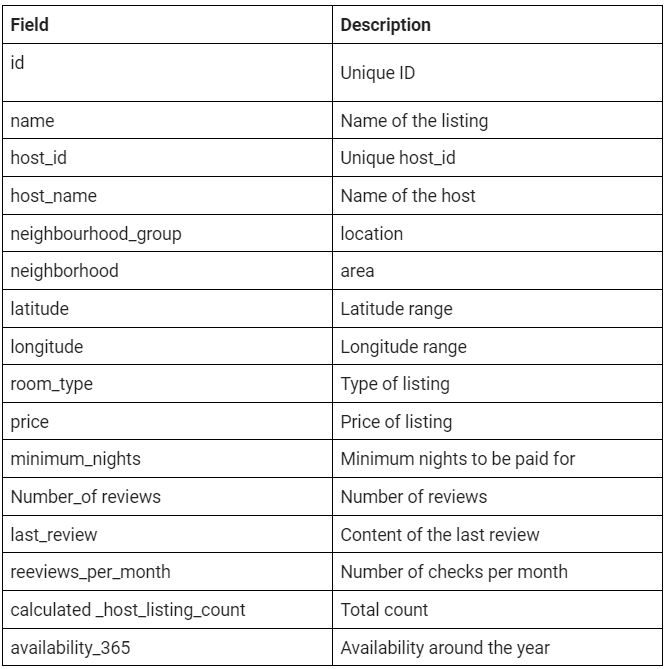

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in ab_df.columns.tolist():
  print(f"No. of unique values in {i} is {ab_df[i].nunique()} .")

In [ ]:
# Check Unique Values for each variable.
ab_df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [6]:
# Write your code to make your dataset analysis ready.
ab_df['total_cost'] = ab_df['price'] * ab_df['minimum_nights']

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [7]:
ab_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   total_cost  
0         149  
1         225  
2         450  
3          89  
4         800

In [ ]:
ab_df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

#### Chart - 1

q=hello

In [ ]:
plot_1 = ab_df.groupby('neighbourhood_group')['price'].mean().reset_index()
plot_1

neighbourhood_group       price
0               Bronx   87.496792
1            Brooklyn  124.383207
2           Manhattan  196.875814
3              Queens   99.517649
4       Staten Island  114.812332

In [ ]:
# Chart - 1 visualization code
plot_1 = ab_df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
fig = px.bar(plot_1, x='neighbourhood_group' , y='price',color='room_type', width=600, height=400)
fig.update_layout(
    title = "avg price of room types in Neighbourhood",
    xaxis_title = "Neighbourhood Group",
    yaxis_title = "Price")
fig.show()

In [ ]:
plot_2 = ab_df.groupby(['neighbourhood_group'])['price'].mean().reset_index()
fig2 = px.bar(plot_2, x='neighbourhood_group' , y='price',width=600, height=400)
fig2.update_layout(
    title = "avg price in Neighbourhood",
    xaxis_title = "Neighbourhood Group",
    yaxis_title = "Price")
fig2.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
plot_2 = ab_df['room_type'].value_counts()
plot_2

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

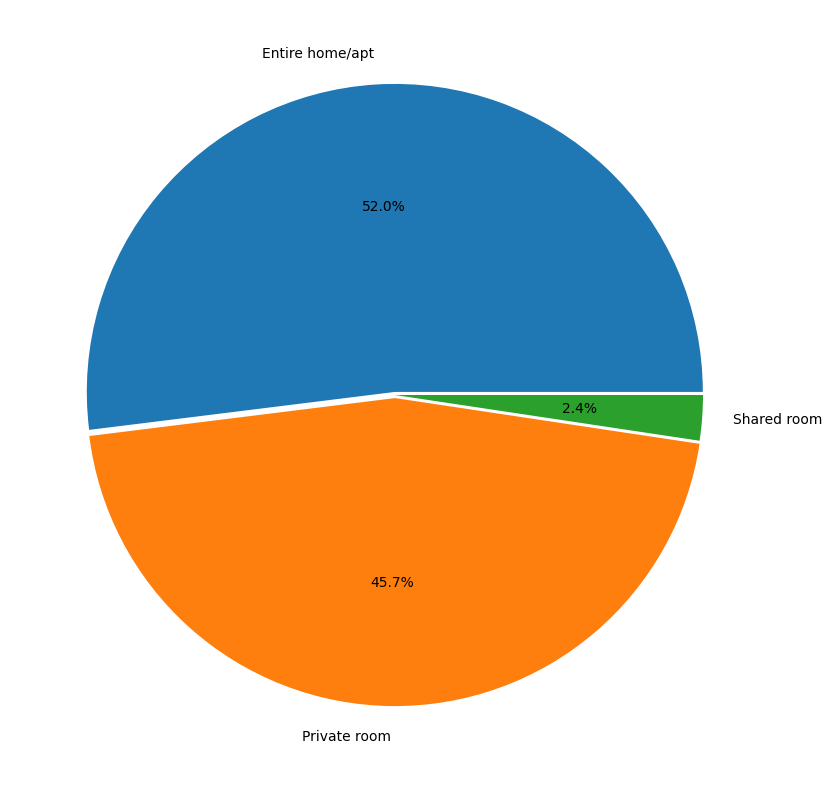

In [ ]:
# Chart - 2 visualization code
plot_2 = ab_df['room_type'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(plot_2, labels=plot_2.index, autopct='%1.1f%%', explode=(0.01,0.01,0))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

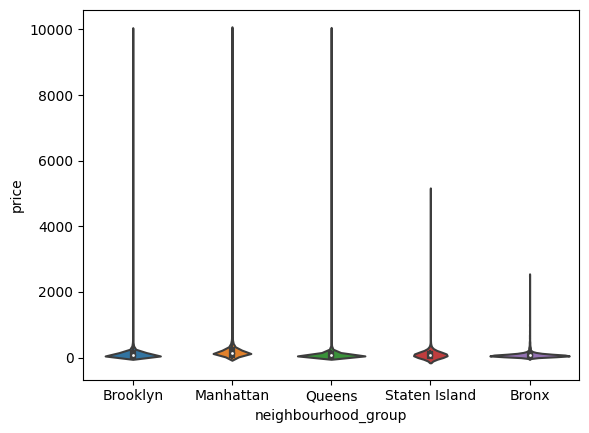

In [ ]:
# Chart - 3 visualization code
sns.violinplot(data=ab_df, x='neighbourhood_group', y='price')
plt.show()

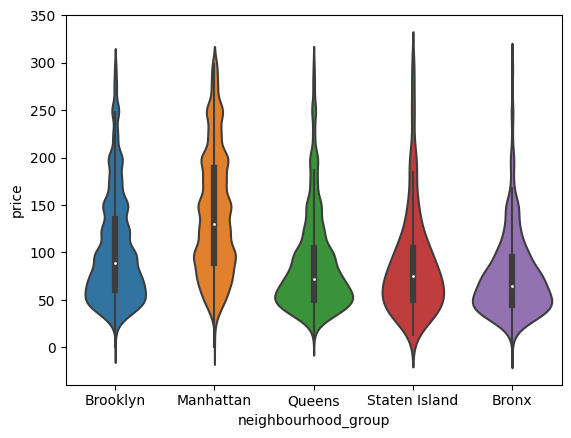

In [ ]:
# outlier remove
new_df = ab_df[ab_df.price<300]
sns.violinplot(data=new_df, x='neighbourhood_group', y='price')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<function matplotlib.pyplot.show(close=None, block=None)>

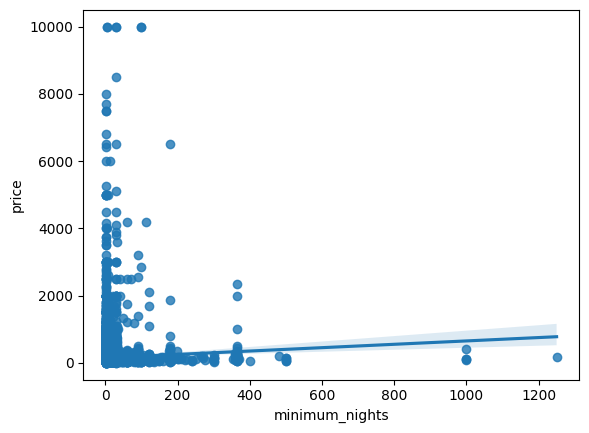

In [ ]:
# Chart - 4 visualization code
sns.regplot(data=ab_df, x='minimum_nights', y='price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

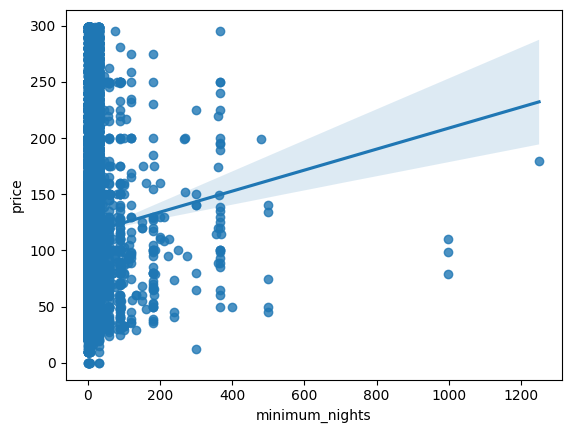

In [ ]:

sns.regplot(data=new_df, x='minimum_nights', y='price')
plt.show

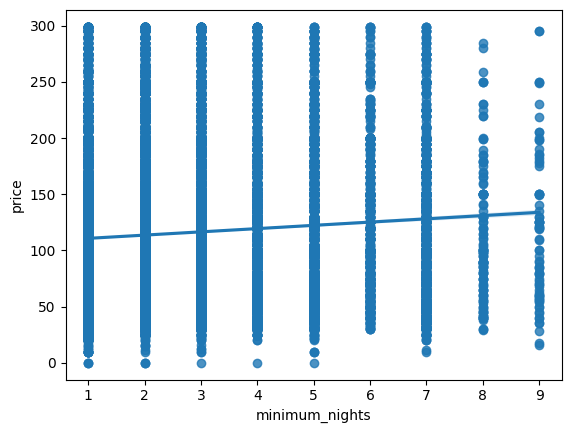

In [ ]:
new_df2 = new_df[new_df.minimum_nights<10]
sns.regplot(data=new_df2, x='minimum_nights', y='price')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

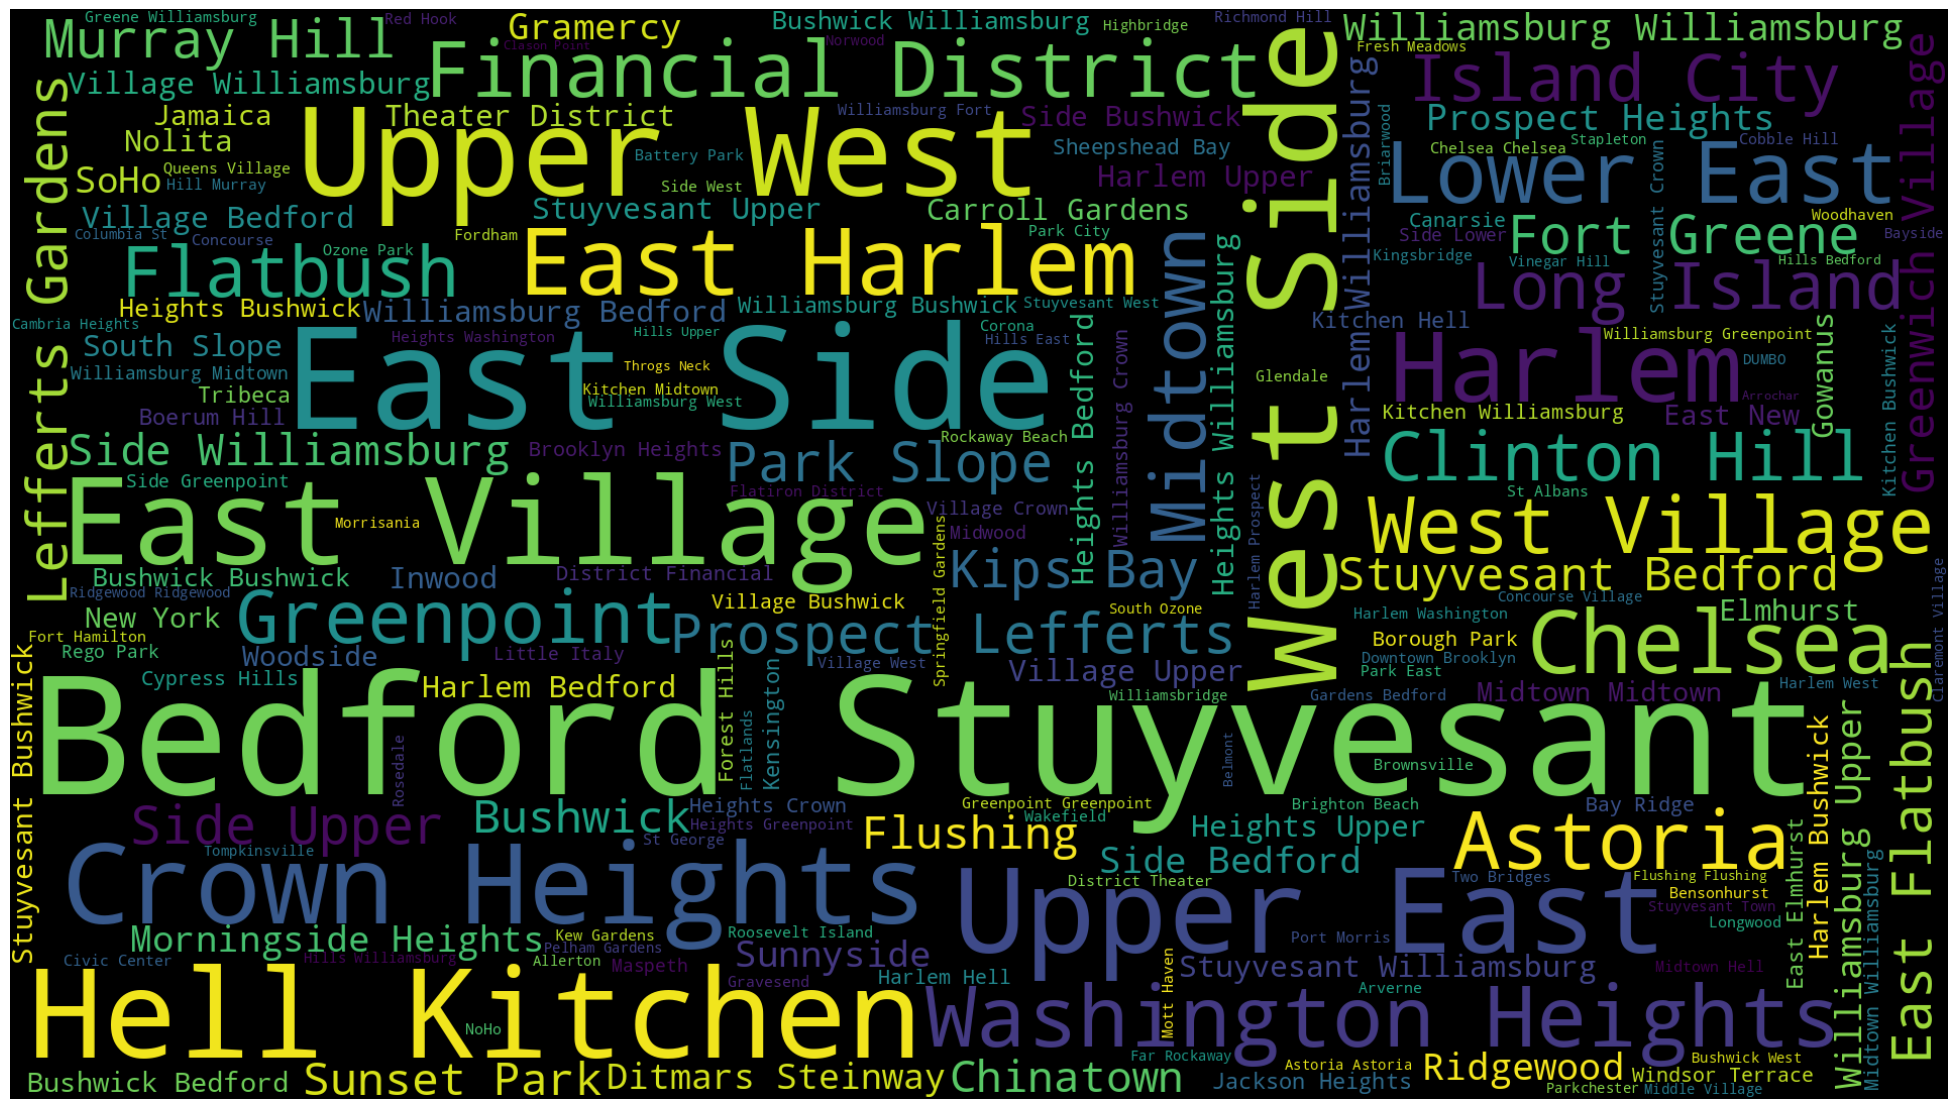

In [150]:
# Chart - 5 visualization code

# Create the wordcloud object
plt.subplots(figsize=(25,15))
text = ' '.join(ab_df.neighbourhood)
wordcloud = WordCloud(
    width=1920,
    height=1080
).generate(text)                                     #   or           .generate(" ".join(ab_df.neighbourhood))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
plot_1 = ab_df.groupby(['neighbourhood'])['price'].mean().reset_index()
fig = px.bar(plot_1, x='neighbourhood' , y='price')
fig.update_layout(
    title = "avg price of room types in Neighbourhood",
    xaxis_title = "Neighbourhood",
    yaxis_title = "Price")
fig.show()

In [ ]:
plot_1 = ab_df.groupby(['neighbourhood'])['price'].mean().reset_index().nlargest(30, columns=['price'])
fig = px.bar(plot_1, x='neighbourhood' , y='price')
fig.update_layout(
    title = "avg price of room types in Neighbourhood",
    xaxis_title = "Neighbourhood",
    yaxis_title = "Price")
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

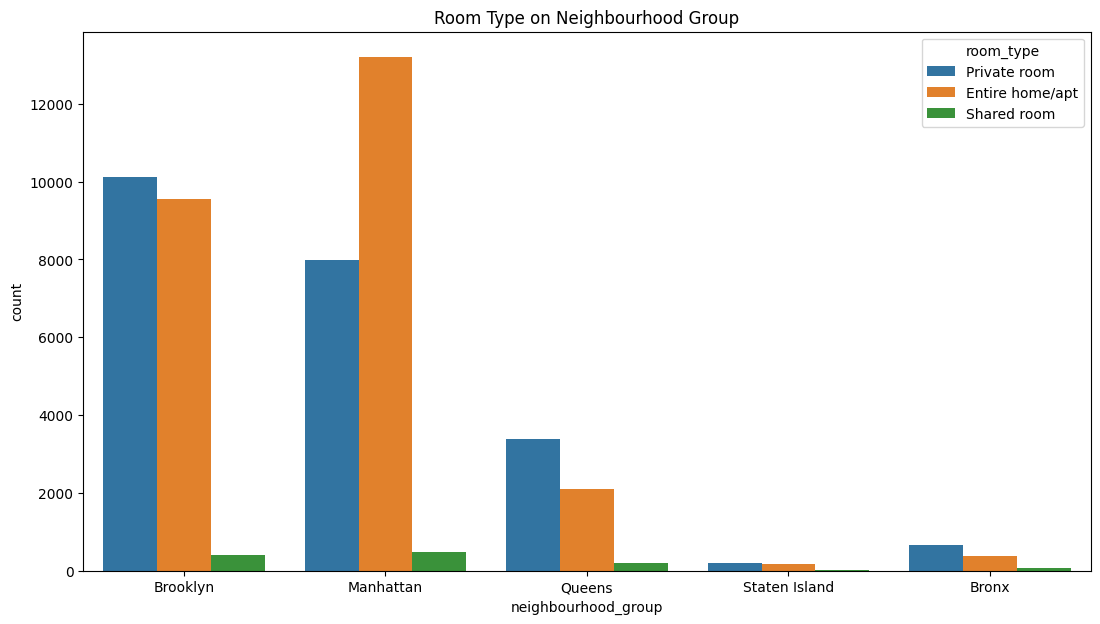

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(data=ab_df, x='neighbourhood_group', hue='room_type')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
plot_7 = ab_df.groupby(['room_type','neighbourhood_group'])['minimum_nights'].mean().reset_index()
plot_7

room_type neighbourhood_group  minimum_nights
0   Entire home/apt               Bronx        5.957784
1   Entire home/apt            Brooklyn        6.531332
2   Entire home/apt           Manhattan       10.539283
3   Entire home/apt              Queens        5.369752
4   Entire home/apt       Staten Island        6.238636
5      Private room               Bronx        3.858896
6      Private room            Brooklyn        5.539479
7      Private room           Manhattan        5.446880
8      Private room              Queens        5.120107
9      Private room       Staten Island        3.632979
10      Shared room               Bronx        3.366667
11      Shared room            Brooklyn        7.753027
12      Shared room           Manhattan        6.766667
13      Shared room              Queens        4.232323
14      Shared room       Staten Island        2.333333

In [ ]:
# Chart - 7 visualization code

fig7 = px.bar(plot_7, x='minimum_nights' , y='room_type',color='neighbourhood_group')
fig7.update_layout(
    title = "avg price in Neighbourhood",
    xaxis_title = "AVG of Minimum Nights",
    yaxis_title = "Neighbourhood Group")
fig7.show()

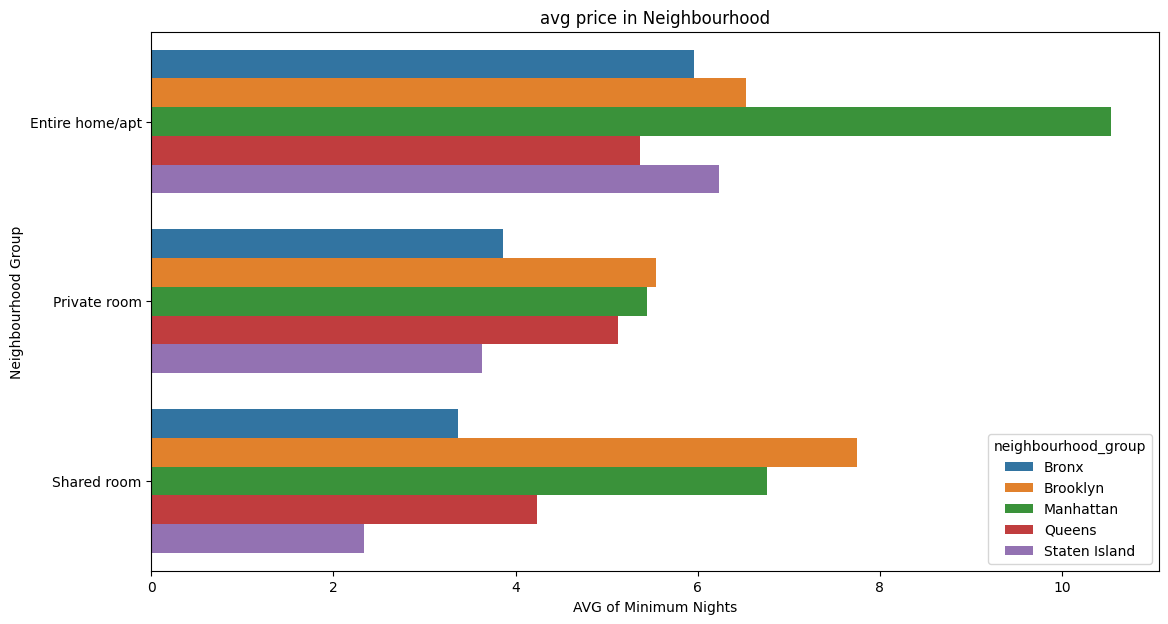

In [ ]:
plt.figure(figsize=(13,7))
sns.barplot(data=plot_7, x='minimum_nights', y='room_type', hue='neighbourhood_group')
plt.title("avg price in Neighbourhood")
plt.xlabel("AVG of Minimum Nights")
plt.ylabel("Neighbourhood Group")
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
ab_df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].mean().unstack()

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                      30.678100     25.018405     7.200000
Brooklyn                   27.945183     21.086952    14.026634
Manhattan                  17.815516     26.202706    21.400000
Queens                     28.933206     27.746441    13.863636
Staten Island              33.278409     30.159574     1.555556

Text(0, 0.5, 'Average of number_of_reviews')

<Figure size 14000x8000 with 0 Axes>

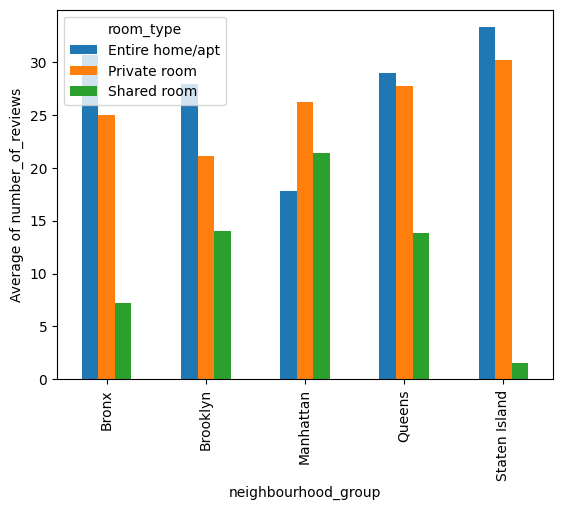

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(140,80))
ab_df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].mean().unstack().plot.bar()
plt.ylabel('Average of number_of_reviews')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
plot_9 = ab_df.groupby('host_name')['reviews_per_month'].max().nlargest(10).reset_index()
plot_9

host_name  reviews_per_month
0   Row NYC              58.50
1    Louann              20.94
2   Nalicia              19.75
3  Danielle              16.22
4     Brent              15.78
5  Lakshmee              15.32
6      Dona              14.58
7     Alina              14.00
8       Sam              14.00
9    Yvonne              13.48

In [ ]:
# Chart - 9 visualization code
fig_9 = px.bar(plot_9, x='reviews_per_month', y='host_name')
fig_9.show()

In [ ]:
plot_9_2 = ab_df.groupby('host_name')['total_cost'].sum().nlargest(10).reset_index()
plot_9_2

host_name  total_cost
0    Blueground     2258580
1         Jenny     1215111
2          Kara     1172637
3           Amy     1153867
4      Kathrine     1002082
5  Sonder (NYC)      950453
6         Iveta      857750
7        Noelle      732930
8       Pranjal      664320
9       Michael      610539

In [ ]:
fig_9_2 = px.bar(plot_9_2, x='total_cost', y='host_name')
fig_9_2.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# import the library
import folium

# Make an empty map
map_ = folium.Map(location=[41,-74], width="100",height="100", tiles="OpenStreetMap", zoom_start=10)

#  map_     -> to show map

In [77]:
map_df = ab_df.groupby(['neighbourhood']).agg({'latitude':'max', 'longitude':'max'}).reset_index()
map_df

neighbourhood  latitude  longitude
0           Allerton  40.87268  -73.84669
1      Arden Heights  40.56033  -74.17388
2           Arrochar  40.59809  -74.06476
3            Arverne  40.59910  -73.78665
4            Astoria  40.77705  -73.90393
..               ...       ...        ...
216  Windsor Terrace  40.66063  -73.97237
217        Woodhaven  40.69907  -73.84611
218         Woodlawn  40.90406  -73.86286
219          Woodrow  40.53884  -74.19826
220         Woodside  40.75631  -73.89029

[221 rows x 3 columns]

In [90]:
# Chart - 10 visualization code
# add marker one by one on the map
for i in range(0,len(map_df)):
   folium.Marker(
      location=[map_df.iloc[i]['latitude'], map_df.iloc[i]['longitude']],
      popup=map_df.iloc[i]['neighbourhood'],
   ).add_to(map_)

# Show the map again
map_

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [89]:
df = ab_df[ab_df['price']<=np.percentile(ab_df['price'],98)]
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   total_cost  
0         149  
1         225  
2         450  
3          89  
4         800

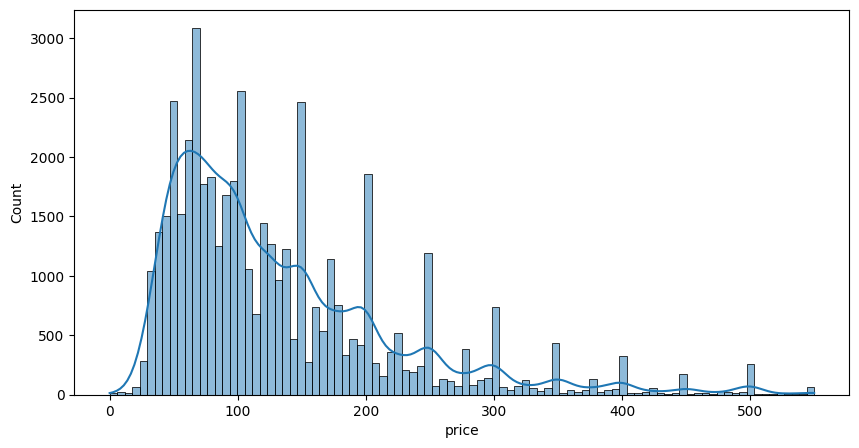

In [87]:
# Chart - 11 visualization code
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='price', kde=True)
plt.show()

<ipython-input-96-f99bbeb76a69>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.price, kde=True)


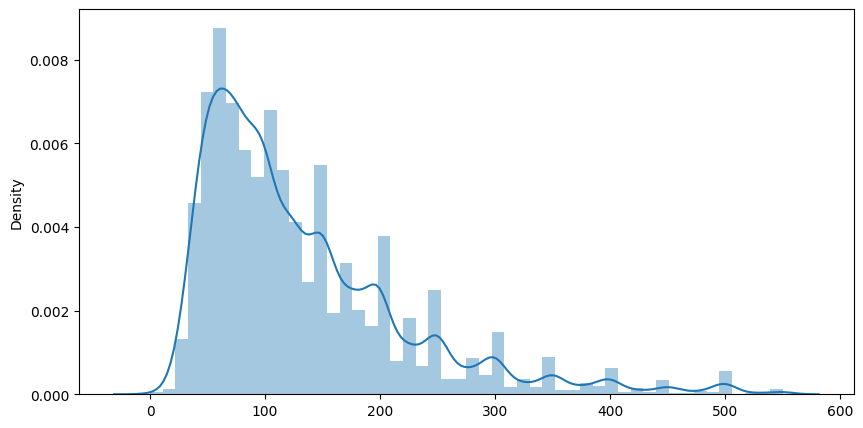

In [96]:
plt.figure(figsize=(10,5))
sns.distplot(x=df.price, kde=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [128]:
plot_12 = ab_df.neighbourhood_group.value_counts()
plot_12

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

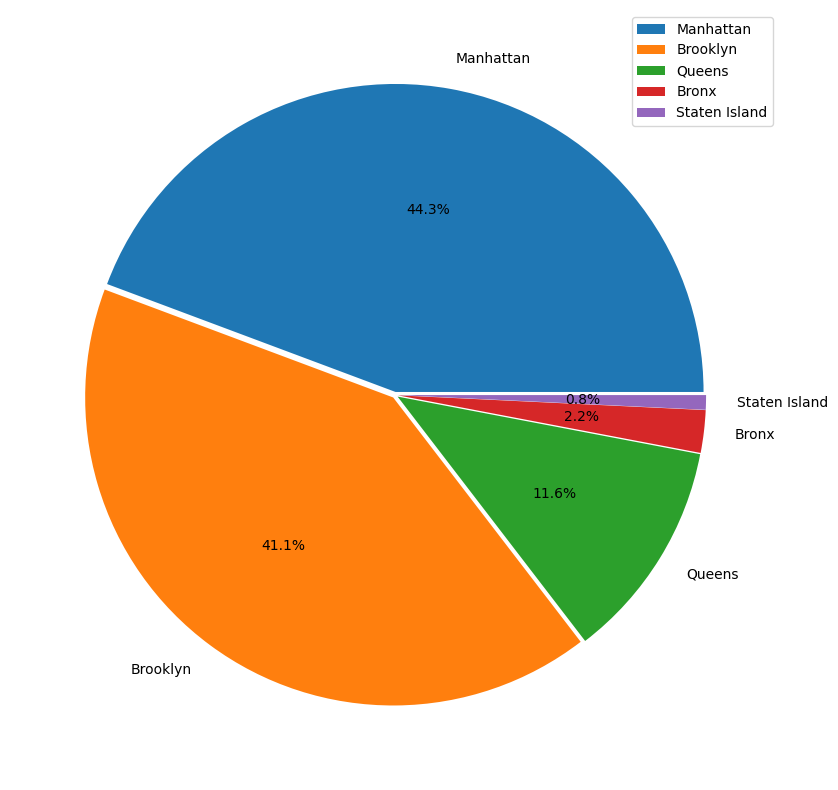

In [129]:
# Chart - 12 visualization code
plt.figure(figsize=(10,10))
plt.pie(plot_12, labels=plot_12.index, autopct='%1.1f%%', explode=(0.01,0.01,0.01,0.01,0.01))
plt.legend(plot_12.index)
plt.show()


#or

# plot_12 = ab_df.neighbourhood_group.value_counts().reset_index()
# plot_12

# plt.figure(figsize=(10,10))
# plt.pie(plot_12.neighbourhood_group, labels=plot_12['index'], autopct='%1.1f%%', explode=(0.01,0.01,0.01,0.01,0.01))
# plt.legend(plot_12['index'])
# plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

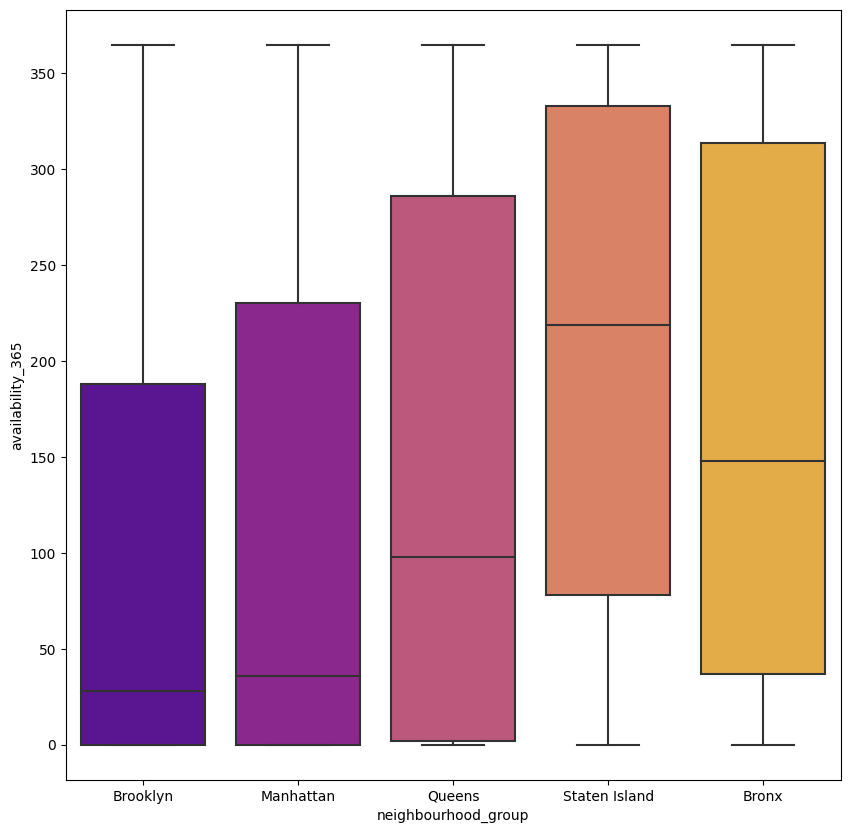

In [130]:
# Chart - 13 visualization code
plt.figure(figsize=(10,10))
sns.boxplot(data=ab_df, x='neighbourhood_group',y='availability_365',palette='plasma')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

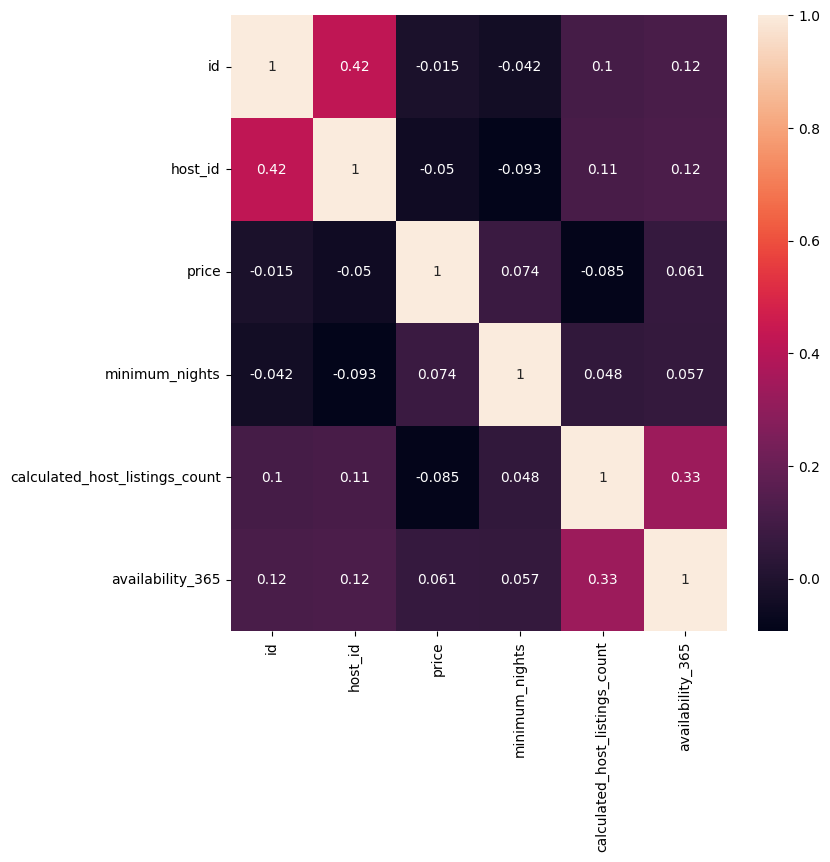

In [136]:
# Correlation Heatmap visualization code
df = ab_df[['id', 'host_id', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']]
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(method='kendall'), annot=True)
plt.show()

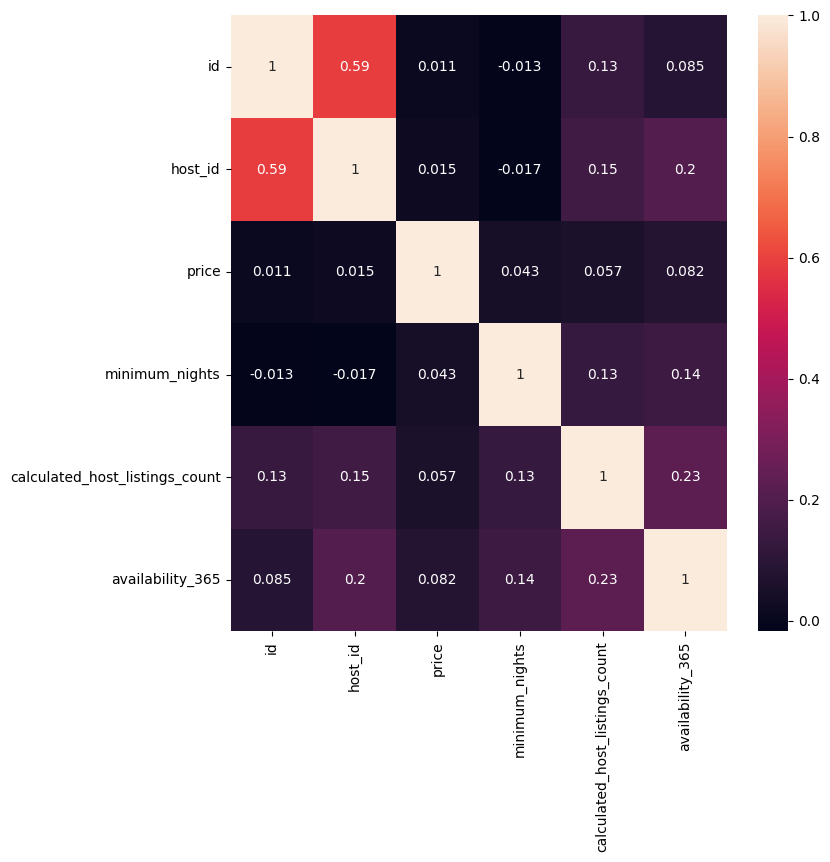

In [137]:
df = ab_df[['id', 'host_id', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']]
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

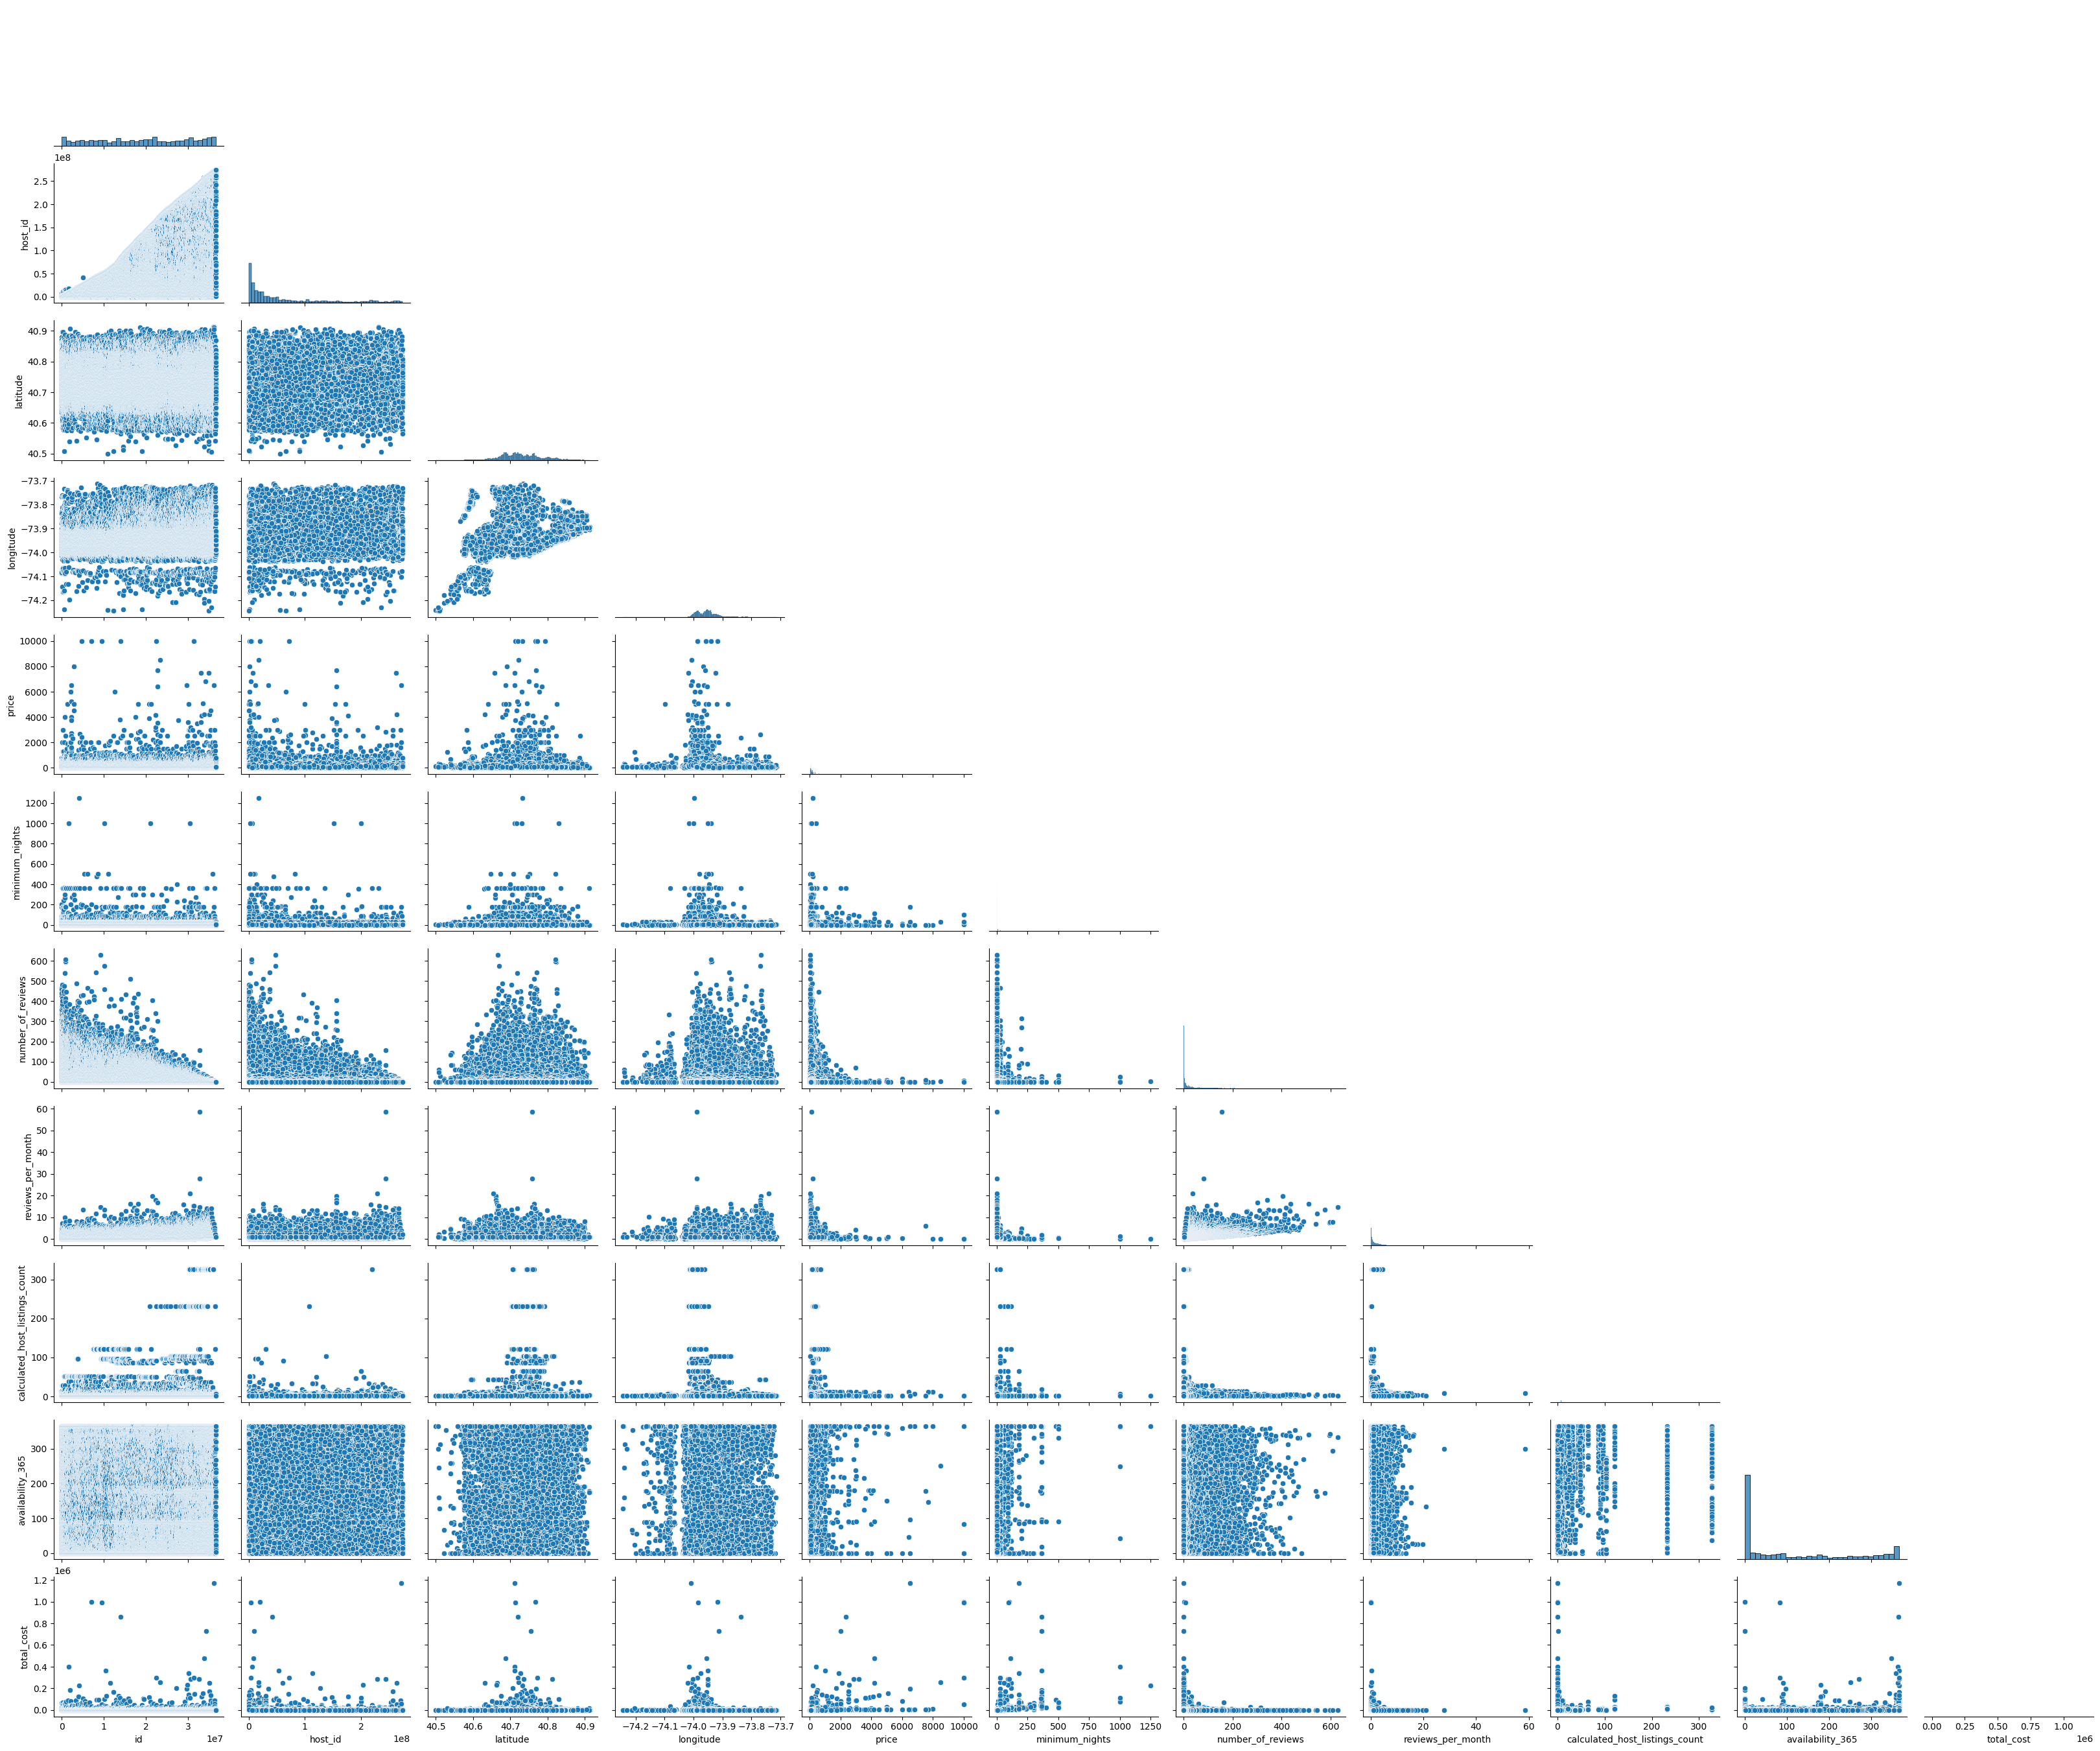

In [151]:
# Pair Plot visualization code
sns.pairplot(ab_df, corner = True,aspect = 1.2)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***